In [3]:
import numpy as np
import matplotlib.pyplot as plt

### Vegard's Law from melting points of pure elements
#### https://pubs.rsc.org/en/content/articlehtml/2012/cp/c1cp23036k

## Add melting points of pure elements

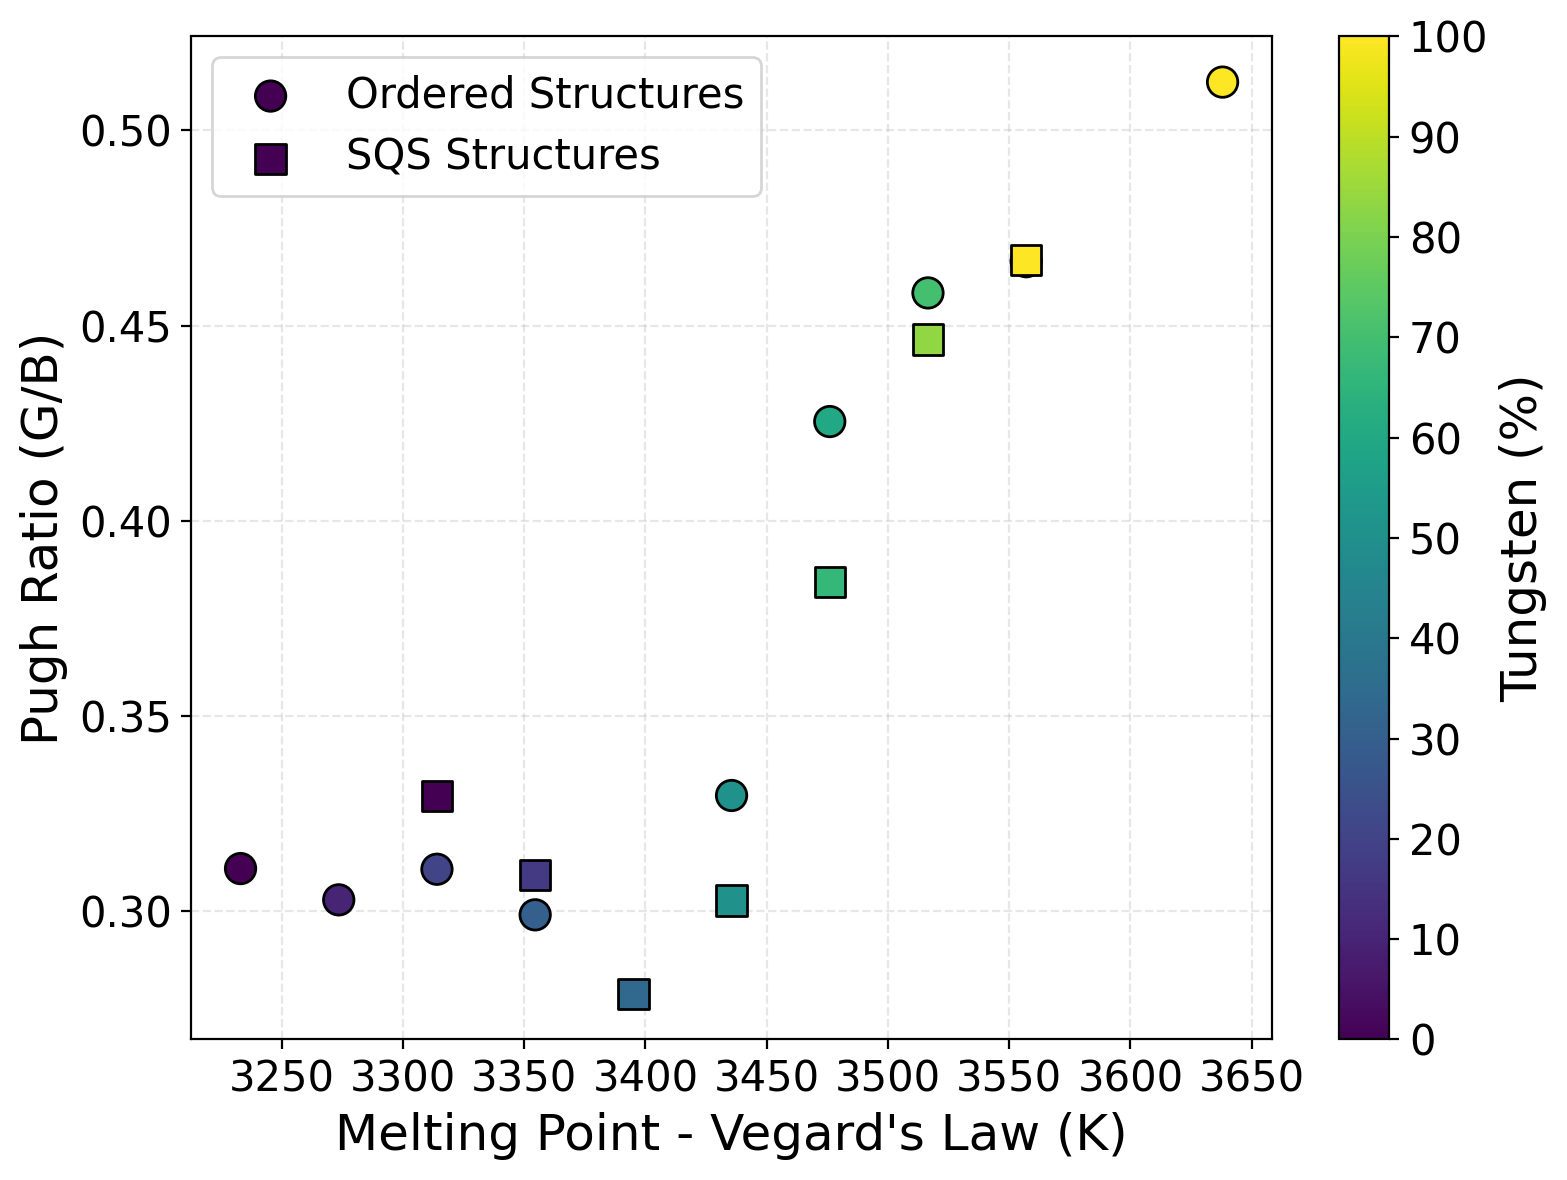

In [37]:
import numpy as np
import matplotlib.pyplot as plt

# Melting points for the same tungsten fractions using Vegard's law (Nb=10%)
T_nb = 2720
T_ta = 3290
T_w = 3695

nb_frac = 0.1
dft_tungsten_fractions = np.array([0, 10, 20, 30, 50, 60, 70, 80, 100]) / 100
ta_fracs = 1 - nb_frac - dft_tungsten_fractions
w_fracs = dft_tungsten_fractions
T_alloys = (nb_frac * T_nb) + (ta_fracs * T_ta) + (w_fracs * T_w)

dft_pugh_ratios = [0.31093764, 0.30292644, 0.31076683, 0.29909123, 0.32965786,
                   0.42543827, 0.45838539, 0.46637931, 0.51238685]

# DFT SQS structures
dft_tungsten_fractions_sqs = np.array([20.0, 30.0, 40.0, 50.0, 60.0, 70.0, 80.0])
dft_pugh_ratios_sqs = [0.32953826, 0.30925632, 0.27884896, 0.30278184, 0.38436216, 0.44642629, 0.46677324]

# Calculate melting points for SQS structures
ta_fracs_sqs = 1 - nb_frac - dft_tungsten_fractions_sqs / 100
w_fracs_sqs = dft_tungsten_fractions_sqs / 100
T_alloys_sqs = (nb_frac * T_nb) + (ta_fracs_sqs * T_ta) + (w_fracs_sqs * T_w)

plt.figure(figsize=(8, 6), dpi=200)
pugh_ratios = np.array(dft_pugh_ratios)
tungsten_percentages = (w_fracs * 100).round().astype(int)
tungsten_percentages_sqs = dft_tungsten_fractions_sqs

# Ordered structures (circles)
sc1 = plt.scatter(T_alloys, pugh_ratios, s=120, c=tungsten_percentages, cmap='viridis', edgecolors="black", zorder=3, marker='o', label='Ordered Structures')
# SQS structures (squares)
sc2 = plt.scatter(T_alloys_sqs, dft_pugh_ratios_sqs, s=120, c=tungsten_percentages_sqs, cmap='viridis', edgecolors="black", zorder=3, marker='s', label='SQS Structures')

cbar = plt.colorbar(sc1, ticks=np.arange(0, 110, 10))
cbar.set_label('Tungsten (%)', fontsize=18)
cbar.ax.tick_params(labelsize=15)

plt.xlabel("Melting Point - Vegard's Law (K)", fontsize=18)
plt.ylabel("Pugh Ratio (G/B)", fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid(alpha=0.3, linestyle="--")
plt.tight_layout()
plt.legend(fontsize=15)
plt.show()

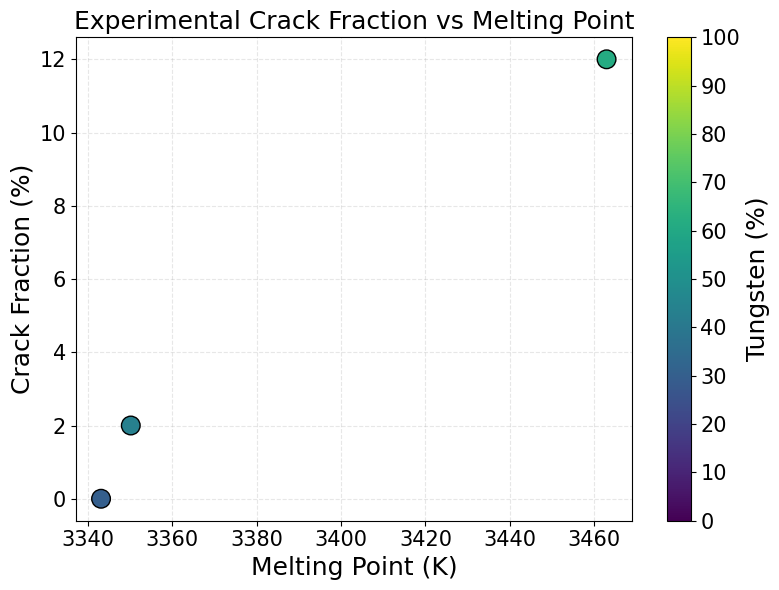

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize

# Experimental data
experimental_alloys = [
    {"W":30, "Ta":58, "Nb":12},
    {"W":43, "Ta":37, "Nb":20},
    {"W":61, "Ta":26, "Nb":13}
]
experimental_crack_fractions = [0, 2, 12]

# Melting points of pure elements
T_w = 3695
T_ta = 3290
T_nb = 2720

# Compute melting points using Vegard's law (weighted average)
T_alloys = []
w_percentages = []

for alloy in experimental_alloys:
    w_frac = alloy["W"]/100
    ta_frac = alloy["Ta"]/100
    nb_frac = alloy["Nb"]/100
    T_alloy = w_frac*T_w + ta_frac*T_ta + nb_frac*T_nb
    T_alloys.append(T_alloy)
    w_percentages.append(alloy["W"])

plt.figure(figsize=(8,6))
norm = Normalize(vmin=0, vmax=100)
sc = plt.scatter(
    T_alloys, experimental_crack_fractions, s=180,
    c=w_percentages, cmap='viridis', norm=norm,
    edgecolors="black", zorder=3
)
cbar = plt.colorbar(sc, ticks=np.arange(0, 110, 10))
cbar.set_label('Tungsten (%)', fontsize=18)
cbar.ax.tick_params(labelsize=15)

plt.xlabel("Melting Point (K)", fontsize=18)
plt.ylabel("Crack Fraction (%)", fontsize=18)
plt.title("Experimental Crack Fraction vs Melting Point", fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid(alpha=0.3, linestyle="--")
plt.tight_layout()
plt.show()